**Consumer Complaints Analysis, Visualization & Prediction**

*The Goal is to analyze and build prediction model to predict which consumer is more likely to dispute the resolution of a complaint.Make predictions for the "Consumer disputed" column.*

**Importing Packages**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import PowerTransformer
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix


from sklearn import metrics 
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.compose import ColumnTransformer

warnings.filterwarnings("ignore")
%matplotlib inline

**Reaaing the Dataset**

In [2]:
df = pd.read_csv("//content//Sample.csv")

In [3]:
### Top 5 Rows

df.head(5)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2016-11-09,Debt collection,Medical,Cont'd attempts collect debt not owed,Debt is not mine,NaN,Company believes complaint caused principally ...,"Firstsource Business Process Services, LLC",WI,54703.0,NaN,Consent not provided,Web,2016-11-27,Closed with explanation,Yes,No,2202626.0
1,2013-11-04,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",MO,63042.0,"Older American, Servicemember",NaN,Postal mail,2013-11-13,Closed with explanation,Yes,No,583787.0
2,2012-07-02,Credit card,NaN,Payoff process,NaN,NaN,NaN,DISCOVER BANK,NC,27513.0,NaN,NaN,Web,2012-07-03,Closed with monetary relief,Yes,No,111425.0
3,2012-11-16,Mortgage,Conventional adjustable mortgage (ARM),"Loan modification,collection,foreclosure",NaN,NaN,NaN,WELLS FARGO & COMPANY,CA,92121.0,NaN,NaN,Web,2012-11-19,Closed with non-monetary relief,Yes,No,193409.0
4,2012-08-14,Student loan,Non-federal student loan,Repaying your loan,NaN,NaN,NaN,"Navient Solutions, LLC.",FL,33511.0,NaN,NaN,Web,2012-08-15,Closed with non-monetary relief,Yes,No,135621.0


In [4]:
### Features

df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [5]:
### Shape

df.shape

(2084, 18)

In [ ]:
### Counting values of Target Features

df['Consumer disputed?'].value_counts()

In [7]:
### Total null values in dataset

df.isnull().sum().sum()

4705

In [8]:
df.columns = df.columns.str.title()
df.columns

Index(['Date Received', 'Product', 'Sub-Product', 'Issue', 'Sub-Issue',
       'Consumer Complaint Narrative', 'Company Public Response', 'Company',
       'State', 'Zip Code', 'Tags', 'Consumer Consent Provided?',
       'Submitted Via', 'Date Sent To Company', 'Company Response To Consumer',
       'Timely Response?', 'Consumer Disputed?', 'Complaint Id'],
      dtype='object')

In [9]:
mode_value= df['Consumer Disputed?'].mode()
mode_value =  'No'

In [10]:
df['Consumer Disputed?'].fillna(mode_value, inplace=True)

In [11]:
df['Consumer Disputed?'].isnull().fillna(mode_value,inplace =True)

In [12]:
df.isnull().mean().round(4)*100

Date Received                    0.00
Product                          0.00
Sub-Product                     30.47
Issue                            0.00
Sub-Issue                       56.38
Consumer Complaint Narrative     2.74
Company Public Response         49.62
Company                          0.05
State                            0.24
Zip Code                         0.19
Tags                            83.93
Consumer Consent Provided?       1.87
Submitted Via                    0.05
Date Sent To Company             0.05
Company Response To Consumer     0.05
Timely Response?                 0.05
Consumer Disputed?               0.00
Complaint Id                     0.05
dtype: float64

In [13]:
# getting the sum of null values and ordering.
total = df.isnull().sum().sort_values(ascending = False)  

In [14]:
#getting the percent and order of null.
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending =False)

In [15]:
# Concatenating the total and percent
data = pd.concat([total , percent],axis =1,keys=['Total' ,'Percent'])

In [16]:
# Returning values of nulls different of 0
(data[~(data['Total'] == 0)])

,Total,Percent
Tags,1749,83.925144
Sub-Issue,1175,56.381958
Company Public Response,1034,49.616123
Sub-Product,635,30.470250
Consumer Complaint Narrative,57,2.735125
Consumer Consent Provided?,39,1.871401
State,5,0.239923
Zip Code,4,0.191939
Submitted Via,1,0.047985
Timely Response?,1,0.047985


In [17]:
### Summary Statistics
df[['Issue','Date Received','Product','Sub-Issue','Consumer Complaint Narrative','Company',
               'Company Public Response','Consumer Consent Provided?',
               'Company Response To Consumer','Submitted Via']].describe().transpose()

,count,unique,top,freq
Issue,2084,73,Incorrect information on credit report,220
Date Received,2084,692,2017-04-20,14
Product,2084,11,Mortgage,481
Sub-Issue,909,52,Debt is not mine,114
Consumer Complaint Narrative,2027,2026,I have been a victim of Identity Theft. I have...,2
Company,2083,449,WELLS FARGO & COMPANY,122
Company Public Response,1050,9,Company has responded to the consumer and the ...,505
Consumer Consent Provided?,2045,3,Consent provided,2027
Company Response To Consumer,2083,5,Closed with explanation,1613
Submitted Via,2083,5,Web,2059


In [43]:
### What are the top 15 issues and sub issues?
Issue_names = df['Issue'].value_counts().index
Issue_names

Index(['Incorrect information on credit report',
       'Loan servicing, payments, escrow account',
       'Cont'd attempts collect debt not owed',
       'Loan modification,collection,foreclosure',
       'Dealing with my lender or servicer',
       'Account opening, closing, or management',
       'Credit reporting company's investigation',
       'Disclosure verification of debt', 'Managing the loan or lease',
       'Application, originator, mortgage broker', 'Communication tactics',
       'Problems when you are unable to pay', 'Deposits and withdrawals',
       'Billing disputes', 'Can't repay my loan',
       'Improper contact or sharing of info',
       'Problems caused by my funds being low',
       'False statements or representation',
       'Taking/threatening an illegal action', 'Taking out the loan or lease',
       'Settlement process and costs',
       'Making/receiving payments, sending money',
       'Unable to get credit report/credit score', 'Other',
       'Using a

In [44]:
Issue_val=df['Issue'].value_counts().values
Issue_val

array([220, 210, 206, 175, 104,  83,  76,  73,  65,  63,  58,  50,  49,
        41,  33,  32,  31,  30,  29,  28,  27,  24,  23,  23,  19,  19,
        18,  15,  15,  15,  13,  13,  11,  11,  11,  11,  10,  10,  10,
         9,   9,   9,   9,   8,   8,   7,   7,   7,   6,   5,   5,   5,
         5,   4,   4,   3,   2,   2,   2,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1])

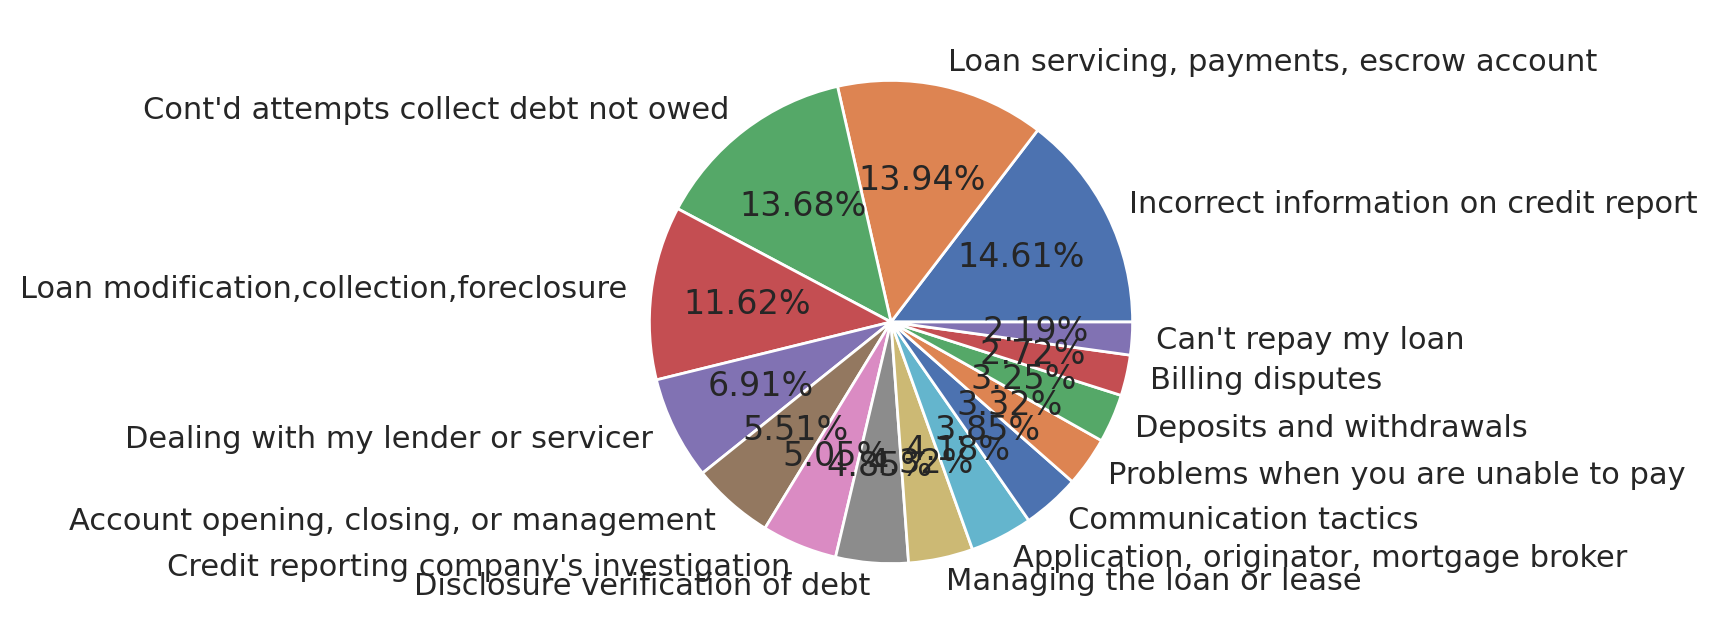

In [45]:
plt.figure(figsize=(14,4),dpi=200)
plt.pie(Issue_val[:15],labels=Issue_names[:15],autopct='%1.2f%%');

In [40]:
### What are the top 15 sub-issues ?
SubIssue_names = df['Sub-Issue'].value_counts().index
SubIssue_names

Index(['Debt is not mine', 'Information is not mine', 'Account status',
       'Debt was paid', 'Not given enough info to verify debt',
       'Frequent or repeated calls', 'Debt resulted from identity theft',
       'Problem with statement of dispute',
       'Trouble with how payments are handled', 'Public record',
       'Received bad information about my loan',
       'Reinserted previously deleted info', 'Don't agree with fees charged',
       'Account terms', 'No notice of investigation status/result',
       'Attempted to collect wrong amount',
       'Having problems with customer service',
       'Right to dispute notice not received',
       'Threatened to take legal action', 'Can't decrease my monthly payments',
       'Investigation took too long', 'Talked to a third party about my debt',
       'Personal information', 'Report improperly shared by CRC',
       'Can't get flexible payment options',
       'Problem getting report or credit score',
       'Problem getting my f

In [41]:
SubIssue_val=df['Sub-Issue'].value_counts().values
SubIssue_val

array([114,  70,  63,  56,  49,  32,  30,  28,  26,  26,  25,  24,  24,
        23,  23,  22,  19,  19,  18,  16,  15,  14,  14,  13,  12,  12,
        11,  10,   9,   9,   9,   8,   6,   6,   6,   6,   5,   5,   5,
         4,   3,   3,   3,   2,   2,   2,   2,   2,   1,   1,   1,   1])

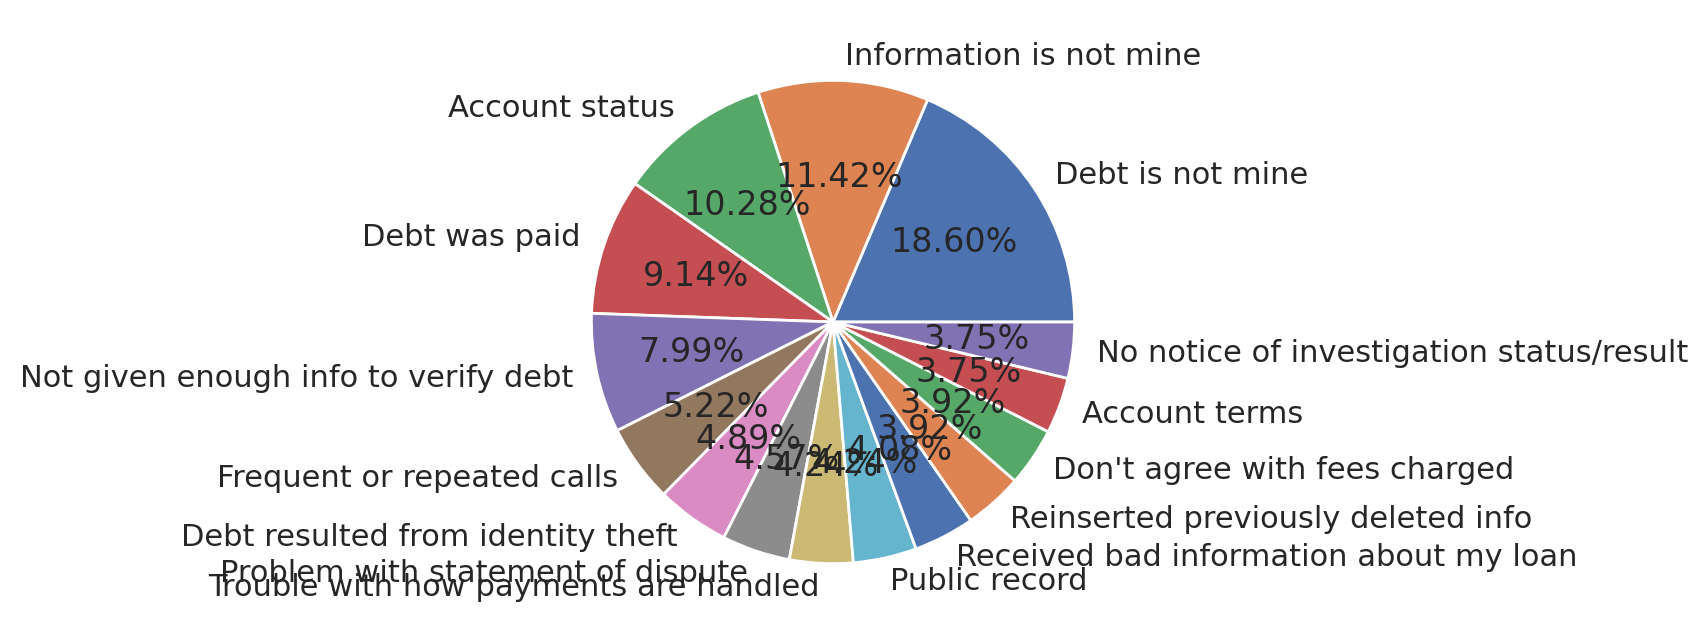

In [42]:
plt.figure(figsize=(14,4),dpi=200)
plt.pie(SubIssue_val[:15],labels=SubIssue_names[:15],autopct='%1.2f%%');

In [32]:
### What are the top 15 Company?
Company_names = df.Company.value_counts().index
Company_names

Index(['WELLS FARGO & COMPANY', 'Experian Information Solutions Inc.',
       'CITIBANK, N.A.', 'EQUIFAX, INC.',
       'TRANSUNION INTERMEDIATE HOLDINGS, INC.',
       'BANK OF AMERICA, NATIONAL ASSOCIATION', 'JPMORGAN CHASE & CO.',
       'Navient Solutions, LLC.', 'Ocwen Financial Corporation',
       'NATIONSTAR MORTGAGE',
       ...
       'Rent Recovery Solutions', 'Valentine and Kebartas, Inc.',
       'GATEWAY FIRST BANK', 'Atlanticus Services Corporation',
       'ADIR INTERNATIONAL LLC', 'FIRST CITIZENS BANCSHARES, INC.',
       'National Collection Systems, Inc.', 'Google Compare Credit Cards Inc.',
       'Ability Recovery Services, LLC', 'American Financial Resources, Inc.'],
      dtype='object', length=449)

In [34]:
Company_val=df.Company.value_counts().values
Company_val

array([122, 114, 111, 110,  98,  90,  70,  67,  43,  42,  41,  39,  39,
        35,  30,  22,  19,  17,  17,  16,  16,  16,  16,  15,  15,  14,
        14,  13,  12,  11,  11,  11,  10,  10,  10,   9,   8,   8,   8,
         8,   8,   8,   7,   7,   7,   7,   7,   6,   6,   6,   6,   6,
         6,   6,   6,   6,   6,   6,   5,   5,   5,   5,   5,   5,   5,
         5,   5,   5,   5,   4,   4,   4,   4,   4,   4,   4,   4,   4,
         4,   4,   4,   4,   4,   3,   3,   3,   3,   3,   3,   3,   3,
         3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,
         3,   3,   3,   3,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   

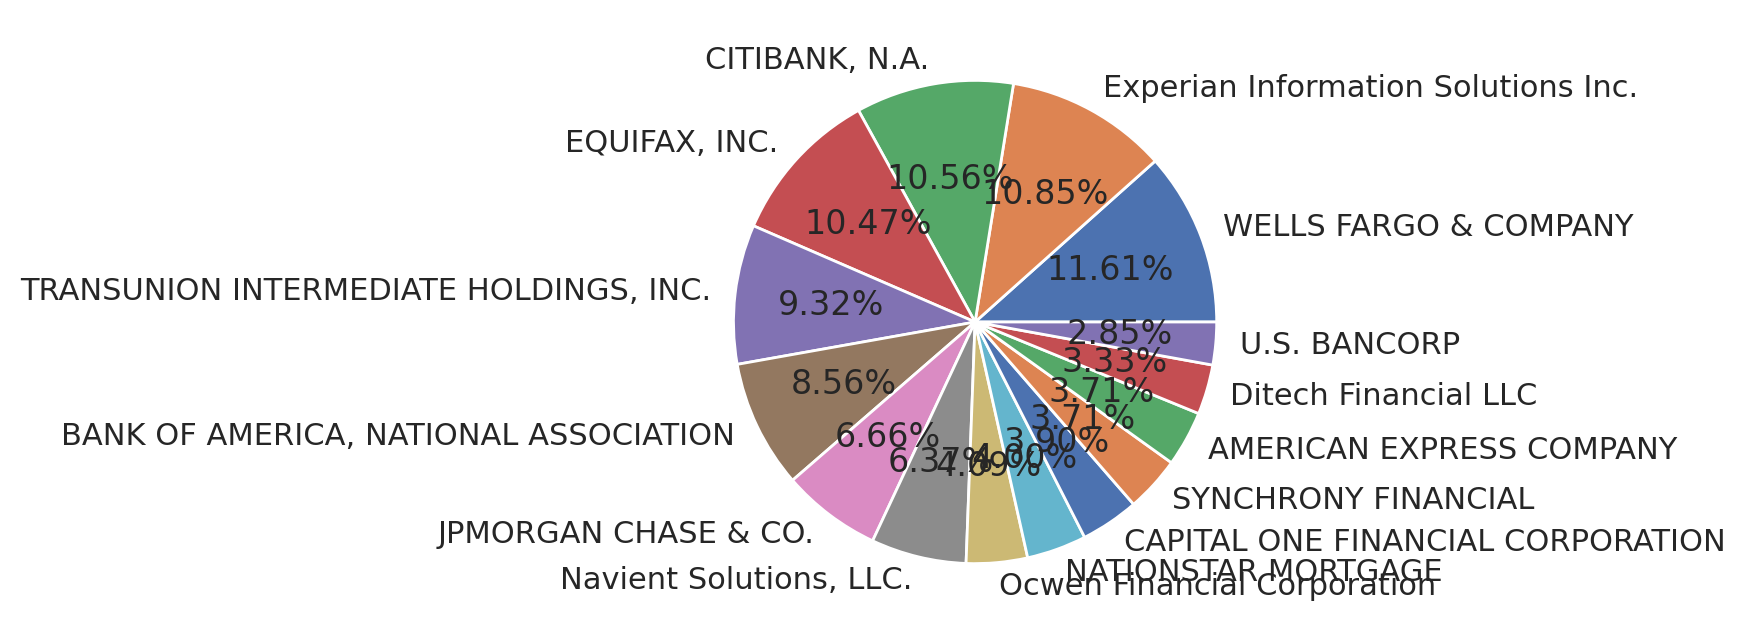

In [36]:

plt.figure(figsize=(14,4),dpi=200)
plt.pie(Company_val[:15],labels=Company_names[:15],autopct='%1.2f%%');

In [46]:
### In which month did most complaints occur and on which day of the week are most complaints received?

from datetime import datetime

In [47]:
df['Date'] =pd.to_datetime(df['Date Received'])

#Extracting Year.
df['Year'] =df['Date'].dt.year

#Extracting Month.
df['Month'] =df['Date'].dt.month_name()

#Extracting Weekdays

df['Week_Days'] = df['Date'].dt.day_name()

In [48]:
df.head(5)

,Date Received,Product,Sub-Product,Issue,Sub-Issue,Consumer Complaint Narrative,Company Public Response,Company,State,Zip Code,...,Submitted Via,Date Sent To Company,Company Response To Consumer,Timely Response?,Consumer Disputed?,Complaint Id,Date,Year,Month,Week_Days
0,2016-11-09,Debt collection,Medical,Cont'd attempts collect debt not owed,Debt is not mine,NaN,Company believes complaint caused principally ...,"Firstsource Business Process Services, LLC",WI,54703.0,...,Web,2016-11-27,Closed with explanation,Yes,No,2202626.0,2016-11-09,2016,November,Wednesday
1,2013-11-04,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",MO,63042.0,...,Postal mail,2013-11-13,Closed with explanation,Yes,No,583787.0,2013-11-04,2013,November,Monday
2,2012-07-02,Credit card,NaN,Payoff process,NaN,NaN,NaN,DISCOVER BANK,NC,27513.0,...,Web,2012-07-03,Closed with monetary relief,Yes,No,111425.0,2012-07-02,2012,July,Monday
3,2012-11-16,Mortgage,Conventional adjustable mortgage (ARM),"Loan modification,collection,foreclosure",NaN,NaN,NaN,WELLS FARGO & COMPANY,CA,92121.0,...,Web,2012-11-19,Closed with non-monetary relief,Yes,No,193409.0,2012-11-16,2012,November,Friday
4,2012-08-14,Student loan,Non-federal student loan,Repaying your loan,NaN,NaN,NaN,"Navient Solutions, LLC.",FL,33511.0,...,Web,2012-08-15,Closed with non-monetary relief,Yes,No,135621.0,2012-08-14,2012,August,Tuesday


**Number of Complaints in Week**

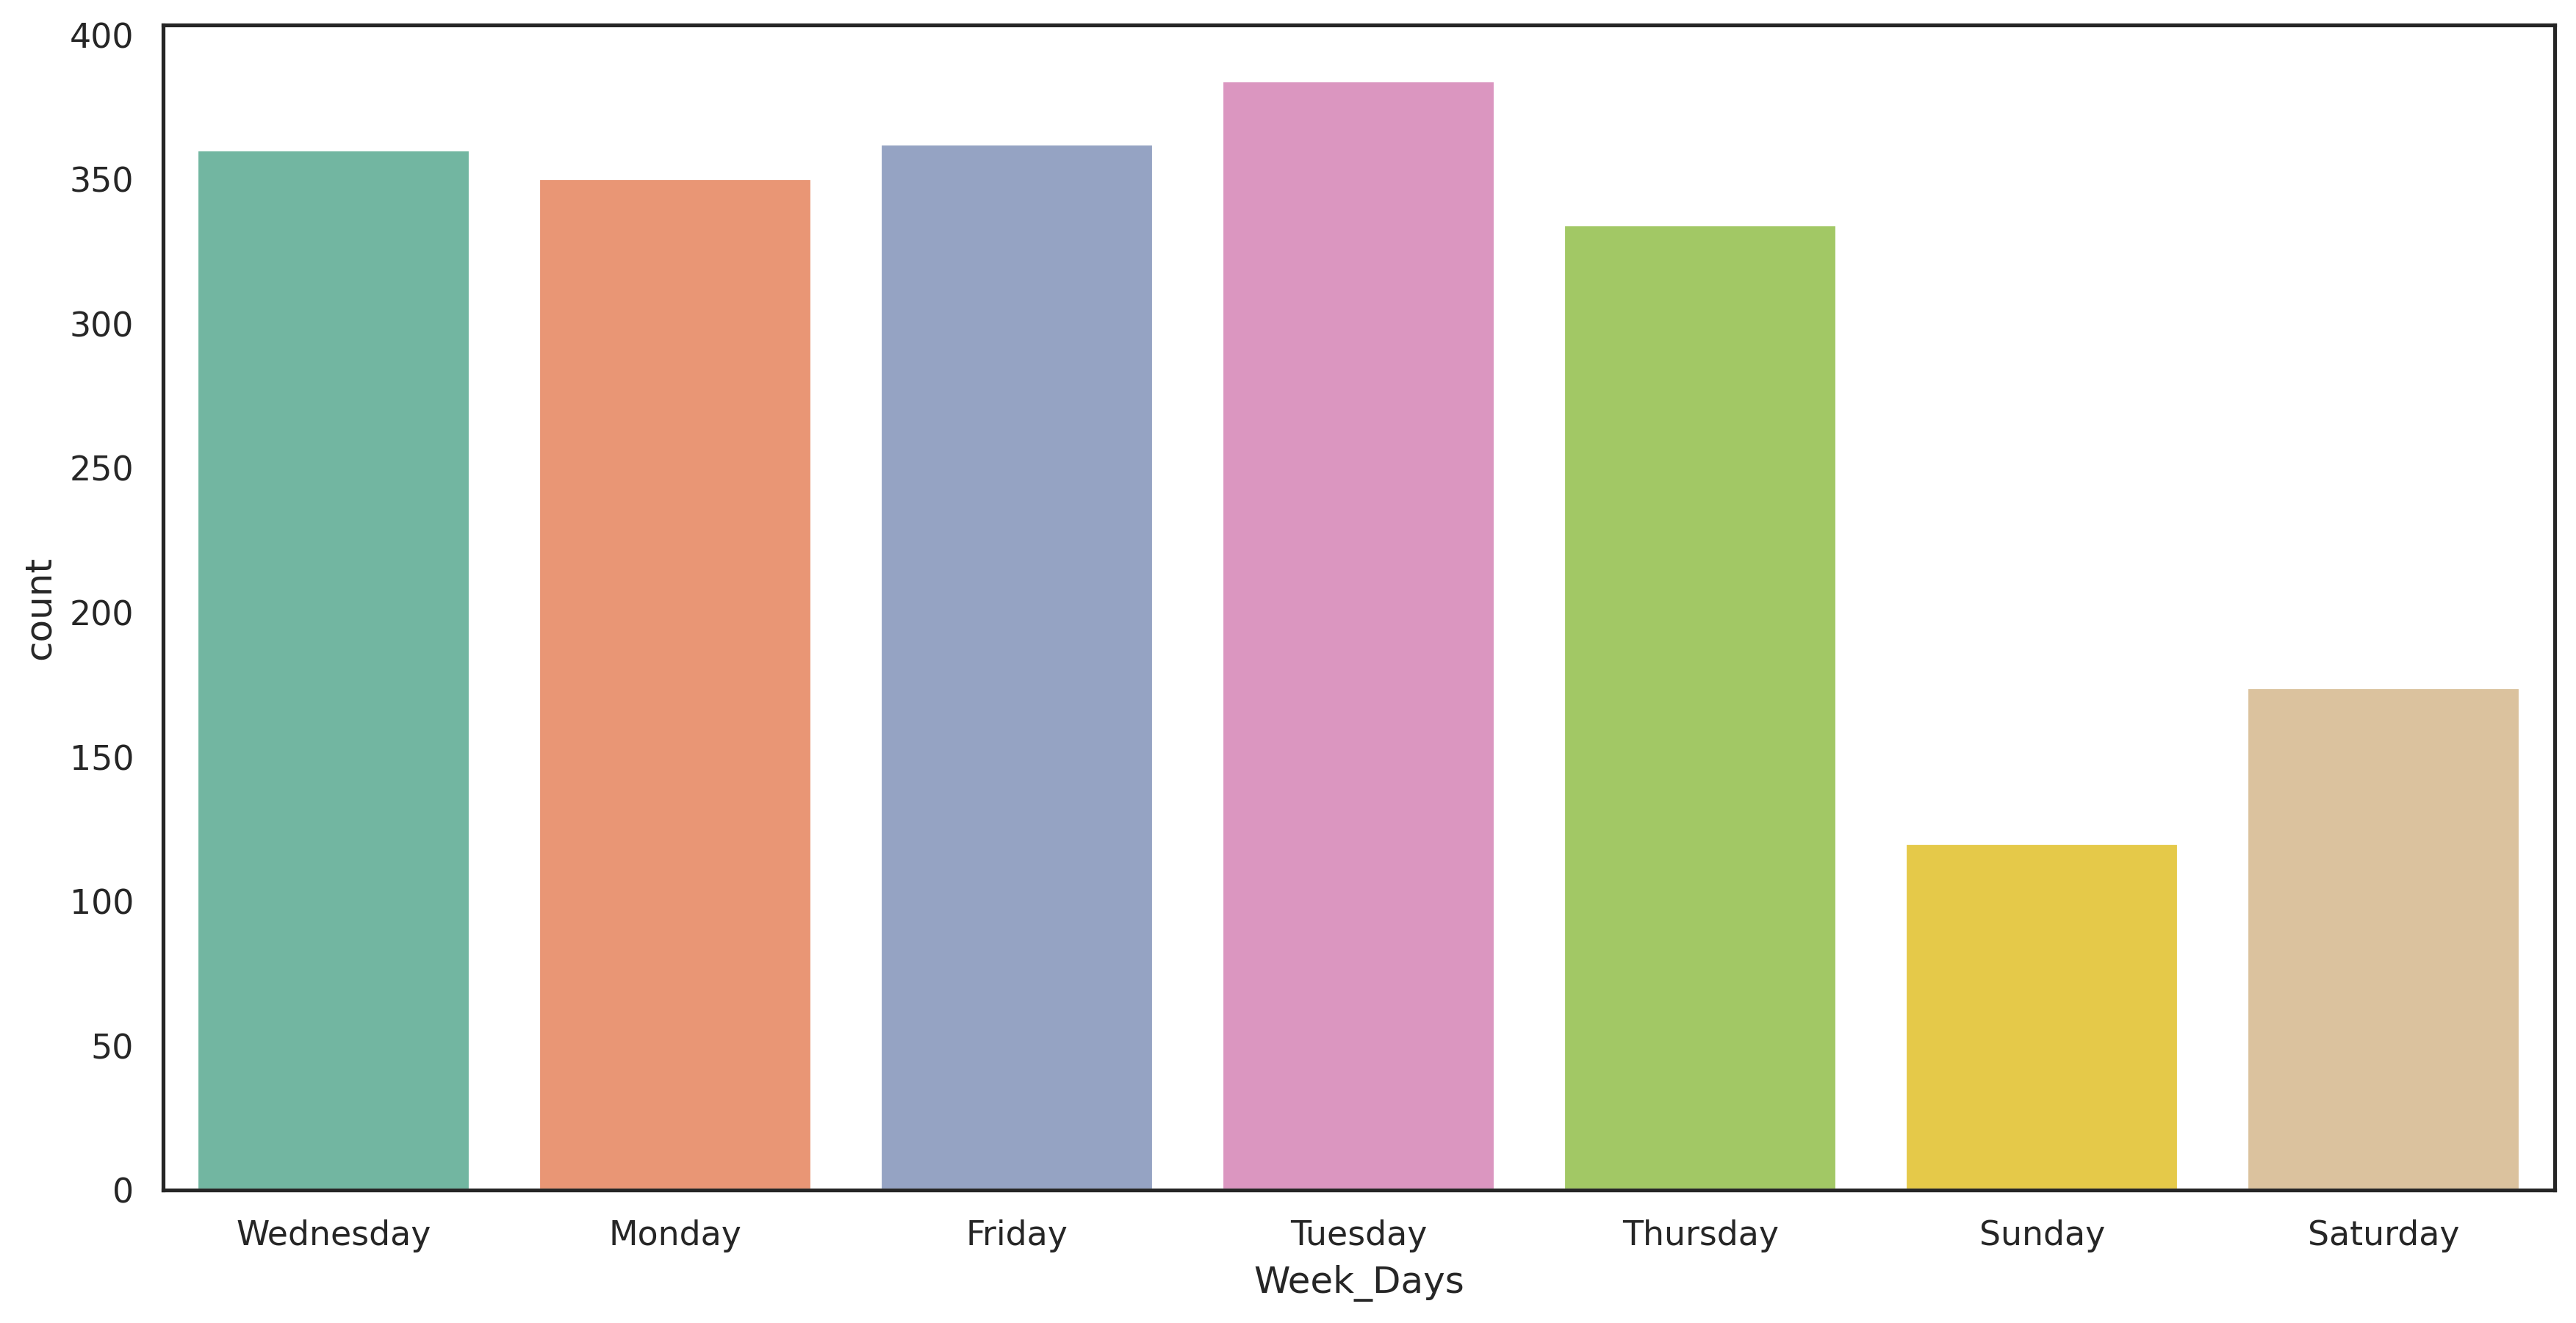

In [49]:
## COUNT PLOT
plt.figure(figsize=(14,7),dpi=300)
sns.countplot(x="Week_Days",data=df,palette='Set2');


**Number of Complaints per month**

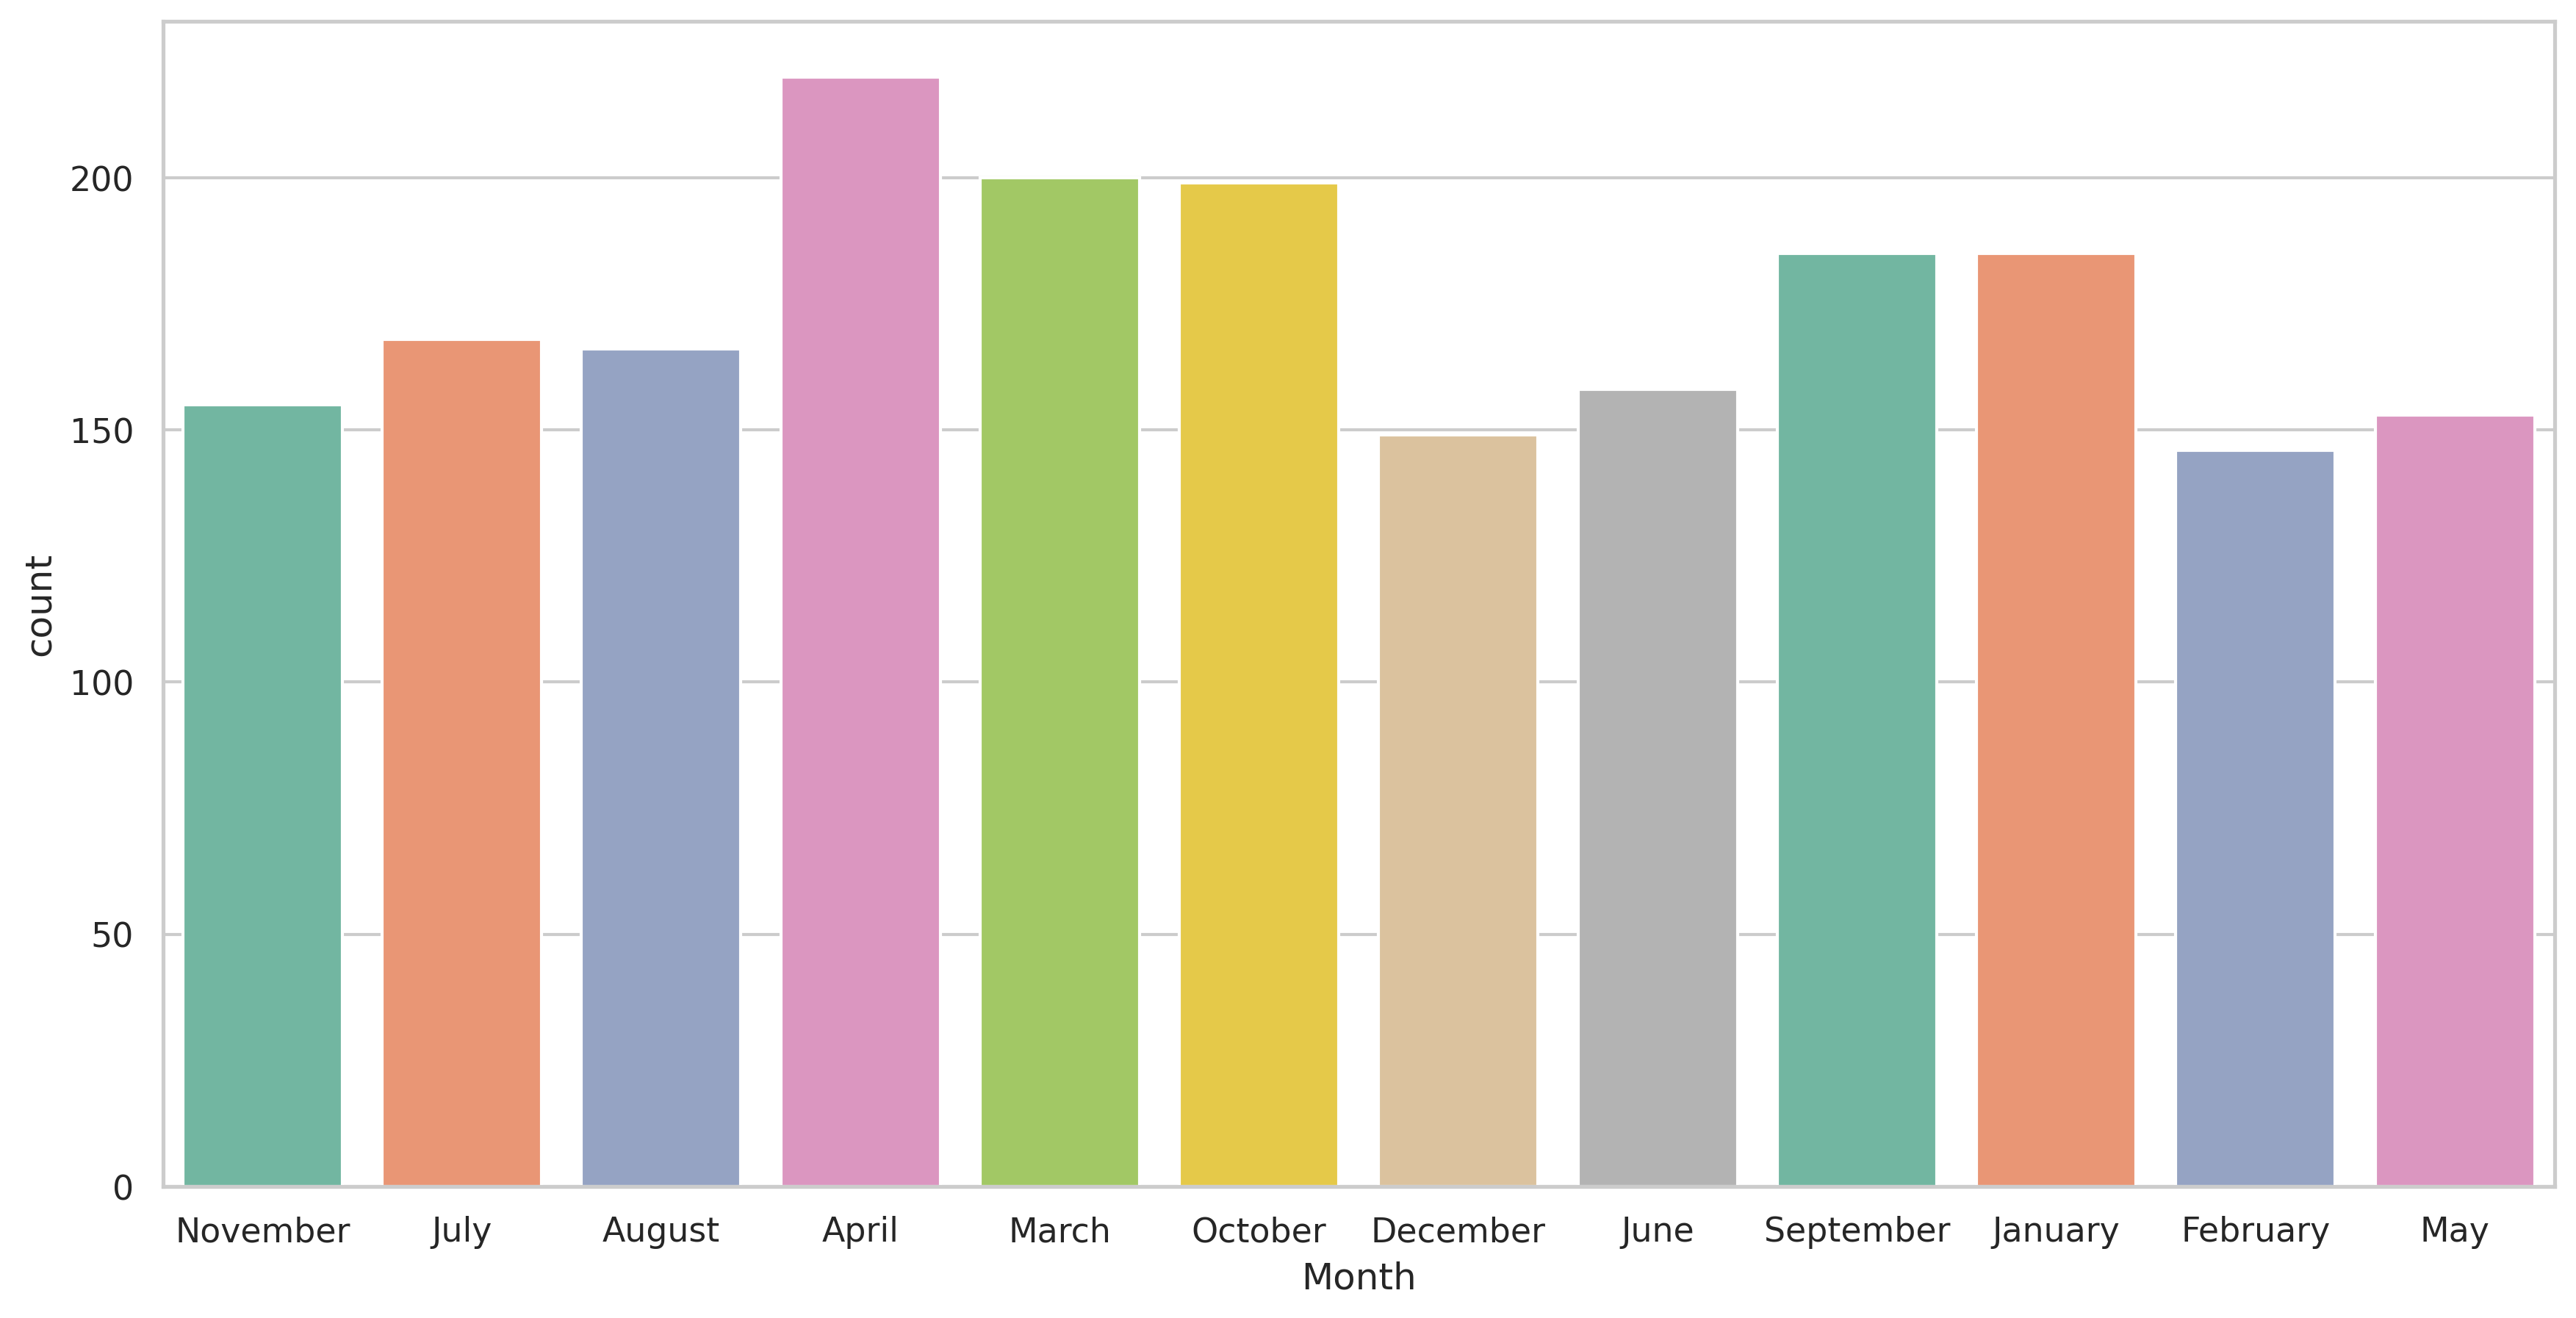

In [52]:
plt.figure(figsize=(14,7),dpi=300)
sns.countplot(x="Month",data=df,palette='Set2');


**Common Complaints received from the Companies**

In [54]:
grouped = df.groupby(['Company Response To Consumer']).size()
grouped

Company Response To Consumer
Closed                               47
Closed with explanation            1613
Closed with monetary relief         172
Closed with non-monetary relief     250
Closed without relief                 1
dtype: int64

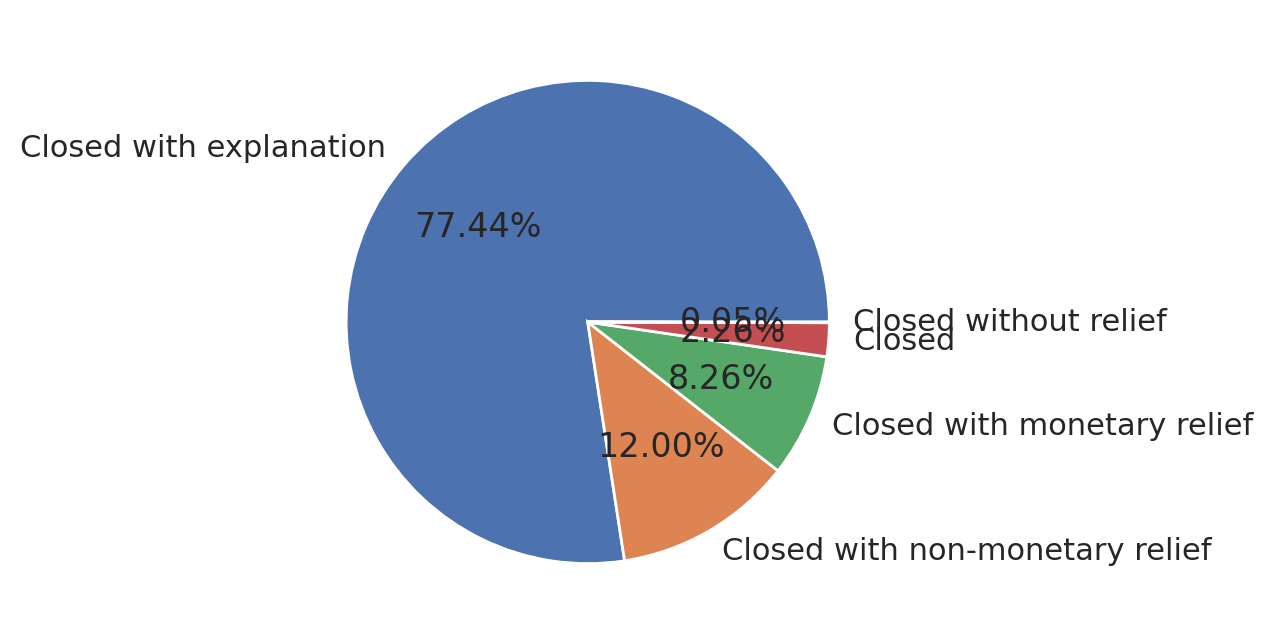

In [56]:
response_values = df['Company Response To Consumer'].value_counts().values
response_labels = df['Company Response To Consumer'].value_counts().index
plt.figure(figsize=(14,4),dpi=200)
plt.pie(response_values,labels=response_labels,autopct='%1.2f%%');

**Which state received the largest number of complaints?**

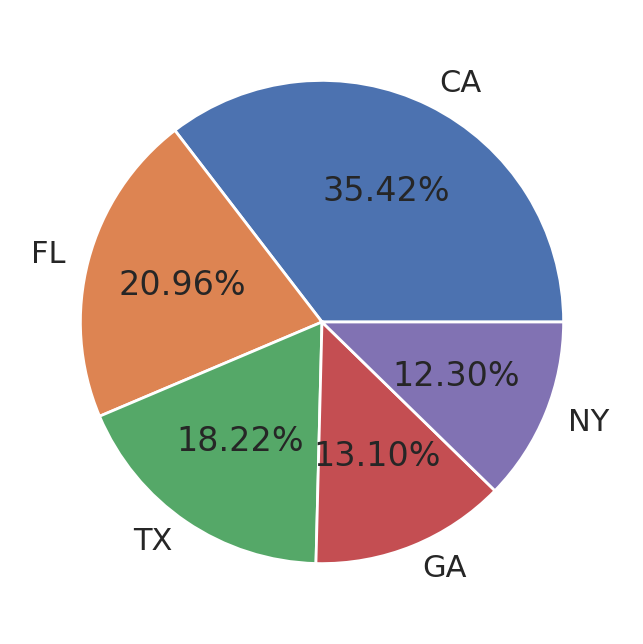

In [58]:
State_values = df['State'].value_counts().values
State_labels = df['State'].value_counts().index
plt.figure(figsize=(14,4),dpi=200)
plt.pie(State_values[:5],labels=State_labels[:5],autopct='%1.2f%%');

**What was the most common medium via which complaints were submitted?**

In [62]:
df.groupby(["Timely Response?","Submitted Via"]).size().reset_index().tail(6)

,Timely Response?,Submitted Via,0
0,No,Web,64
1,Yes,Fax,1
2,Yes,Phone,2
3,Yes,Postal mail,7
4,Yes,Referral,14
5,Yes,Web,1995


**Consumers that disputed the company response and those that did not?**

In [64]:
df.groupby(["Timely Response?","Consumer Disputed?"]).size().reset_index().tail(6)

,Timely Response?,Consumer Disputed?,0
0,No,No,53
1,No,Yes,11
2,Yes,No,1548
3,Yes,Yes,471


**Random Forest on Consumer Complaints Dataset**
*Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual*

In [65]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
onehotencoder =OneHotEncoder()

In [66]:
# Label Encoding the Consumer Disputed? column
df['Consumer_encode']= labelencoder.fit_transform(df['Consumer Disputed?'])

In [67]:
enc = OneHotEncoder(handle_unknown='ignore')
df1 = pd.DataFrame(enc.fit_transform(df[['Product']]).toarray())
data = df.join(df1)

In [68]:
data.head()

,Date Received,Product,Sub-Product,Issue,Sub-Issue,Consumer Complaint Narrative,Company Public Response,Company,State,Zip Code,...,1,2,3,4,5,6,7,8,9,10
0,2016-11-09,Debt collection,Medical,Cont'd attempts collect debt not owed,Debt is not mine,NaN,Company believes complaint caused principally ...,"Firstsource Business Process Services, LLC",WI,54703.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2013-11-04,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",MO,63042.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2012-07-02,Credit card,NaN,Payoff process,NaN,NaN,NaN,DISCOVER BANK,NC,27513.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012-11-16,Mortgage,Conventional adjustable mortgage (ARM),"Loan modification,collection,foreclosure",NaN,NaN,NaN,WELLS FARGO & COMPANY,CA,92121.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2012-08-14,Student loan,Non-federal student loan,Repaying your loan,NaN,NaN,NaN,"Navient Solutions, LLC.",FL,33511.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


**Splitting Independent features from Dependent ones**

In [69]:
x = data.iloc[:,24:41].values
y = data['Consumer_encode'].values

In [71]:
data.columns

Index([               'Date Received',                      'Product',
                        'Sub-Product',                        'Issue',
                          'Sub-Issue', 'Consumer Complaint Narrative',
            'Company Public Response',                      'Company',
                              'State',                     'Zip Code',
                               'Tags',   'Consumer Consent Provided?',
                      'Submitted Via',         'Date Sent To Company',
       'Company Response To Consumer',             'Timely Response?',
                 'Consumer Disputed?',                 'Complaint Id',
                               'Date',                         'Year',
                              'Month',                    'Week_Days',
                    'Consumer_encode',                              0,
                                    1,                              2,
                                    3,                              4,
      

**Splitting the dataset into the Training set and Test set**

In [72]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size =0.25, random_state =10)

**Feature Scaling**

In [73]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train =sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

**Fitting Random Forest Classification to the Training set**

In [74]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10,criterion='entropy', random_state =10)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=10)

**Predicting the Test set results**

In [75]:
y_pred = classifier.predict(x_test)

**Making the Confusion Matrix**

In [76]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[410   0]
 [111   0]]


**Model Accuracy Score** 

In [77]:
from sklearn.metrics import accuracy_score
print('Accuracy Score:',accuracy_score(y_test,y_pred))

Accuracy Score: 0.7869481765834933


In [78]:
true_positive = cm[0][0]
false_positive = cm[0][1]
false_negative = cm[1][0]
true_negative = cm[1][1]

In [79]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7869481765834933

In [80]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

1.0

In [81]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.7869481765834933

In [82]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8807733619763695

In [83]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.5

In [84]:
from sklearn.metrics import  roc_curve, roc_auc_score

In [85]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

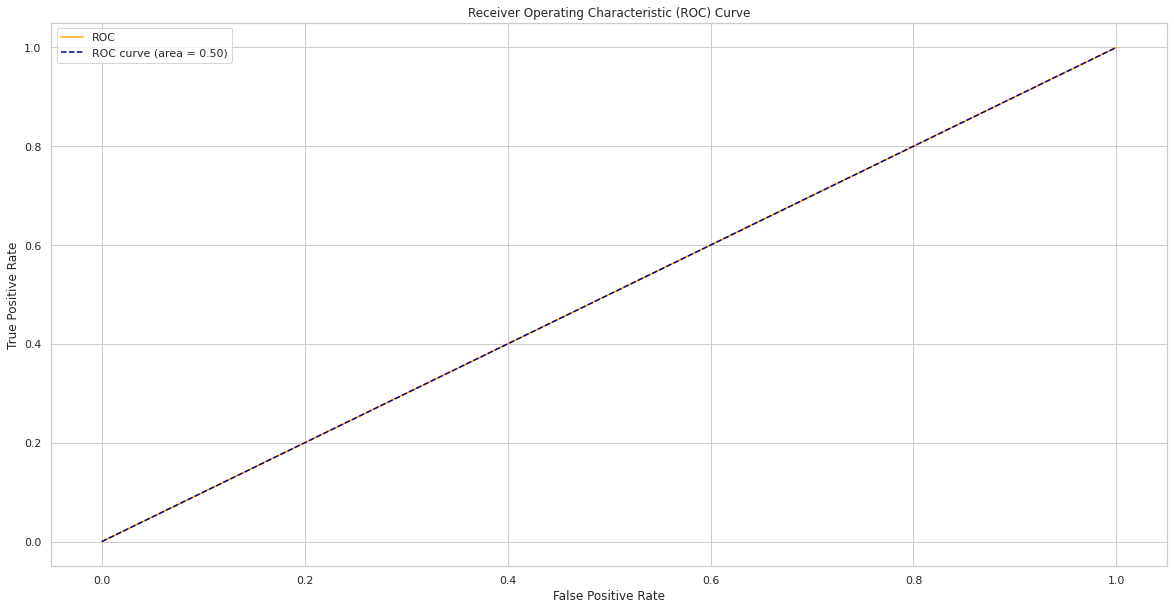

In [86]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [87]:
from sklearn.metrics import classification_report

In [88]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88       521
           1       0.00      0.00      0.00         0

    accuracy                           0.79       521
   macro avg       0.50      0.39      0.44       521
weighted avg       1.00      0.79      0.88       521

